# Assignment 8
### Beija Richardson
### 5/8/2025

### The libraries you will use are already loaded for you below

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes.  These are the "credits.csv" and "titles.csv" files from this week's exercises


Print the number of unique genres. The problem is that each movie has one or more genres lists, in a form that looks like
['Genre_Name1','Genre_Name2','Genre_Name3']

So we need to 

a.) extract this column
b.) get rid of all the [] symbols
c.) force all the genre names into a single list
d.) Find the unique values in that list


This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replaced you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them.

Set up a loop to iterate through the indices of the list,   make changes in the values in the list, checking each step as you go, and looking up the conversions you will need




In [99]:
# your code here

infile1="titles-1.csv"

infile2="credits-1.csv"

titles=pd.read_csv(infile1)

credits=pd.read_csv(infile2)

In [101]:
from itertools import chain

genres_column = titles['genres']

genres_list = genres_column.tolist()

cleaned_genres = [genre.replace('[', '').replace(']', '').replace("'", '').replace(' ', '') for genre in genres_list]

split_genres = [genre.split(',') for genre in cleaned_genres]

flattened_genres = list(chain(*split_genres))

unique_genres = set(flattened_genres)


In [103]:
print(f"Number of unique genres: {len(unique_genres)}")

print(f"Unique genres: {unique_genres}")


Number of unique genres: 20
Unique genres: {'comedy', '', 'european', 'crime', 'animation', 'drama', 'scifi', 'documentation', 'horror', 'sport', 'romance', 'family', 'reality', 'action', 'war', 'fantasy', 'history', 'music', 'western', 'thriller'}


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. 

To do this you will need to aggregate the max by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [97]:
year_scores = titles[['release_year', 'imdb_score']]

avg_scores_by_year = year_scores.groupby('release_year')['imdb_score'].mean()

avg_scores_df = avg_scores_by_year.reset_index()

max_index = avg_scores_df['imdb_score'].idxmax()

max_year, max_score = avg_scores_df.loc[max_index, ['release_year', 'imdb_score']]

print(f"The release year with the highest average IMDb score is {max_year} with an average score of {max_score:.2f}")

The release year with the highest average IMDb score is 1985.0 with an average score of 8.00


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [69]:
# your code here

print(credits.columns)

non_null_credits = credits.dropna(subset=['name', 'name'])

actor_counts = non_null_credits.groupby('name').size()

movie_with_208_actors = actor_counts[actor_counts == 208]

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [71]:
if not movie_with_208_actors.empty:
    print(f"The movie(s) with exactly 208 credited actors: {movie_with_208_actors.index.tolist()}")
else:
    print("No movie found with exactly 208 credited actors.")

No movie found with exactly 208 credited actors.


## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 


Think about how you would do this,  probably by extracting a list of movie id's for films with De Niro from the credits file, then adding the corresponding imdb scores and years to this data



In [79]:
# your code here
import seaborn as sns

import matplotlib.pyplot as plt

In [81]:
de_niro_movies = credits[credits['name'] == 'Robert De Niro']

movie_ids_de_niro = de_niro_movies['id'].tolist()

de_niro_movies_info = titles[titles['id'].isin(movie_ids_de_niro)][['title', 'imdb_score', 'release_year']]

max_imdb_score_movie = de_niro_movies_info.loc[de_niro_movies_info['imdb_score'].idxmax()]

print(f"The movie with the highest IMDb score for Robert De Niro is '{max_imdb_score_movie['title']}' with a score of {max_imdb_score_movie['imdb_score']} (released in {max_imdb_score_movie['release_year']}).")

The movie with the highest IMDb score for Robert De Niro is 'Taxi Driver' with a score of 8.3 (released in 1976).


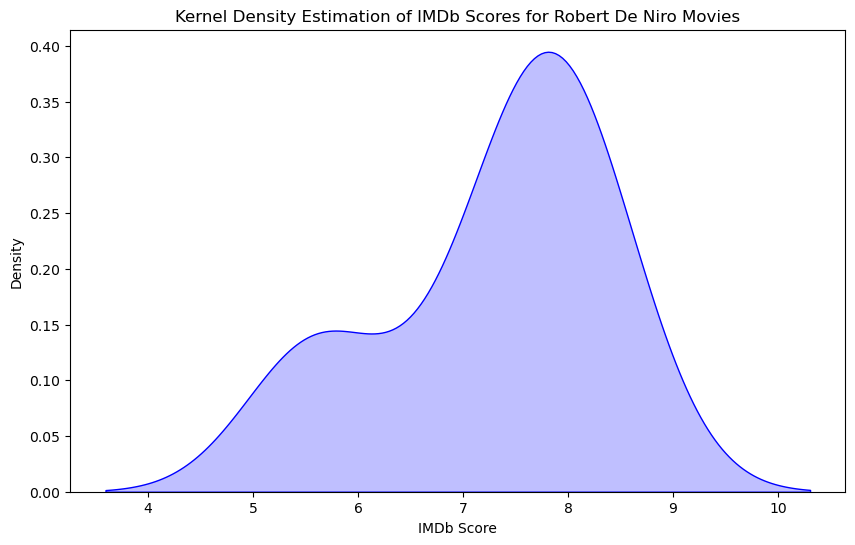

In [83]:
plt.figure(figsize=(10, 6))
sns.kdeplot(de_niro_movies_info['imdb_score'], fill=True, color='blue')
plt.title('Kernel Density Estimation of IMDb Scores for Robert De Niro Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Density')
plt.show()


## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


In [93]:
titles['war_movies'] = titles['description'].str.contains(r'\bwar\b', case=False, na=False)

titles['gangster_movies'] = titles['description'].str.contains(r'\bgangster\b', case=False, na=False)

war_movie_count = titles['war_movies'].sum()

gangster_movie_count = titles['gangster_movies'].sum()

print(f"Number of war movies: {war_movie_count}")

print(f"Number of gangster movies: {gangster_movie_count}")

Number of war movies: 155
Number of gangster movies: 27


In [95]:
war_avg_score = titles.loc[titles['war_movies'], 'imdb_score'].mean()

gangster_avg_score = titles.loc[titles['gangster_movies'], 'imdb_score'].mean()

print(f"Average IMDb score for war movies: {war_avg_score:.2f}")

print(f"Average IMDb score for gangster movies: {gangster_avg_score:.2f}")

Average IMDb score for war movies: 6.93
Average IMDb score for gangster movies: 6.34


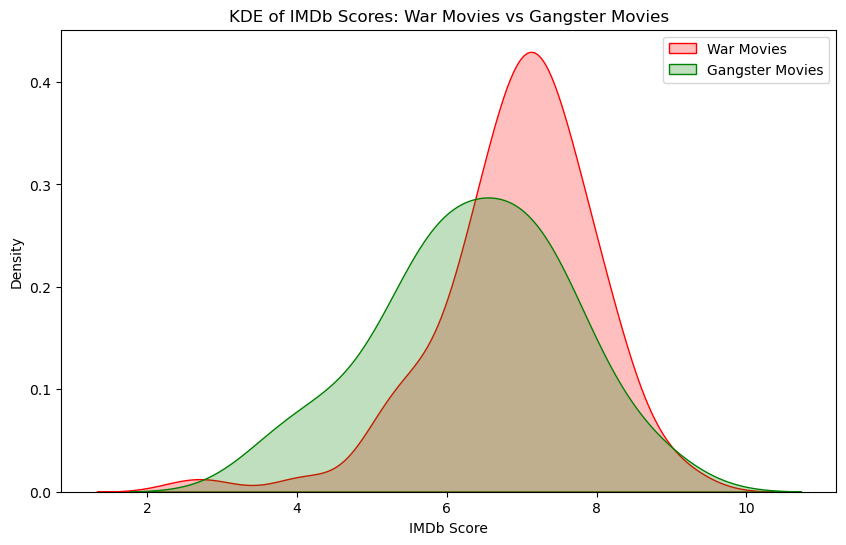

In [91]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titles.loc[titles['war_movies'], 'imdb_score'], fill=True, label='War Movies', color='red')
sns.kdeplot(titles.loc[titles['gangster_movies'], 'imdb_score'], fill=True, label='Gangster Movies', color='green')
plt.title('KDE of IMDb Scores: War Movies vs Gangster Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Density')
plt.legend()
plt.show()